Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 

Collaborators: 

In [113]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 6:  Linear Algebra Part 1

## Question 1

[25] - Write a function that computes the least-squares fit of a given polynomial order $n$ without using the function `numpy.linalg.lstsq` and `numpy.vander` (i.e. construct the system that needs to be solved yourself).  This function should return the coefficients of the resulting polynomial in accending order of powers.  If the function does not receive valid input (most notably an underconstrained system) raise a `ValueError` with an appropriate error message.  Make sure to mention this in your `doc-string`.  You can use `numpy.linalg.solve`. 

Also write a function that plots the resulting polynomial along with the data given the data, a set of $x$ points and the coefficients from the first function.  Make sure to label your plot (both the axes and with a legend).

In [98]:
def compute_lstsq(data, n):
    """Computes the least-squares fit of a given polynomial order n
    
    :Input:
     - *data* (numpy.ndarray) A given polynomial
     - *n* (int) The order of the polynomial d
     
    :Output:
     - *p* (numpy.ndarray) Coefficients of the polynomial (in ascending order of powers)
     
     :raises ValueError: if the input is invalid, so when N_p < N
    """

    if n > N: 
        raise ValueError("Not valid input due undercontrained system (N_p < N)")
    
    y = numpy.zeros(N)
    
    A = numpy.zeros([N, n+1])
    for i in range(N):
        for j in range(n+1):
            A[i,j] = data[i,0]**(j)
        y[i] = data[i,1]

    p = numpy.dot(numpy.linalg.inv(numpy.dot(A.transpose(), A)), numpy.dot(A.transpose(), y))

    return p

def plot_lstsq(data, x, p):
    
    b = numpy.zeros(numpy.size(x))
    for i in range(N_p + 1):
        b += p[i] * x**i

    plt.plot(x, b)
    plt.plot(data[:,0], data[:,1], 'go')
    

Success!


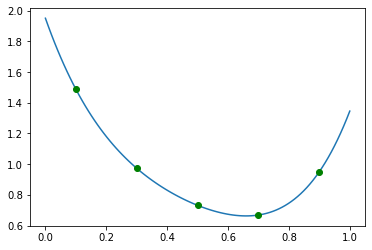

In [99]:
try:
    N = 5
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    raise e
else:
    P = numpy.zeros(N)
    for n in range(N):
        P += p[n] * data[:, 0]**n
    numpy.testing.assert_allclose(P, data[:, 1])
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

<ipython-input-100-3e9867412b74>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))


Success!


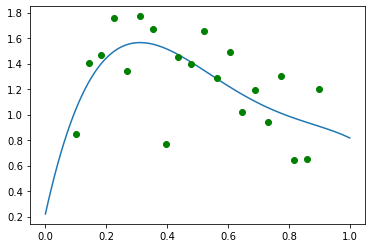

In [100]:
try:
    N = 20
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

In [101]:
try:
    N = 5
    N_p = 6
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()
    assert(False)

Not valid input due undercontrained system (N_p < N)


## Question 2

Consider a square matrix that looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  1 &  ~ &  ~ &  ~ &  ~ &  ~ \\
         1 & -2 &  1 &  ~ &  ~ &  ~ &  ~ \\
         ~ &  1 & -2 &  1 &  ~ &  ~ &  ~ \\
         ~ &  ~ & \ddots & \ddots & \ddots & ~ & ~\\
         ~ &  ~ & ~ & 1 & -2 & 1 & ~ \\
         ~ &  ~ & ~ & ~ & 1 & -2 & 1 \\
         ~ &  ~ & ~ & ~ &  ~ & 1 & -2 \\
    \end{bmatrix}
$$
This matrix can be characterized as having $A_{ii} = -2$, $A_{ii-1} = A_{ii+1} = 1$ so that the "main" diagonal has the value -2 and the secondary-diagonals are 1 (these are the diagonals that are just above and below the main diagonal).  This matrix is from a discretization of the second derivative using a second order finite difference formula (hence the values of 1, -2, and 1 and the $\Delta x^2$ factor) with boundary conditions set to 0.  

**(a)** [10] - Write a function that computes the eigenvalues of the matrix above using whatever functions you would like.  The function should take in the size of the matrix $m$ (the matrix should be square) and the value of $\Delta x$ and return the eigenvalues.  You may use the `numpy.linalg.eigvals` command.

In [104]:
# Source/reference: https://github.com/mandli/intro-numerical-methods/blob/master/11_LA_QR.ipynb

def compute_eigenvalues(m, dx):
    # Aii = -2, Aii-1 = Aii+1 = 1
    A = numpy.zeros([m, m])
    for i in range(m):
        for j in range(m):
            if i == j:
                A[i,j] = -2
            if (i == (j+1)) or (i == (j-1)):
                A[i,j] = 1
    A /= (dx**2)
    
    for i in range(100):
        Q, R = numpy.linalg.qr(A)
        A = numpy.dot(R, Q)
        
    eigenVals = numpy.linalg.eigvals(A)
    eig_values = eigenVals[::-1]

    return eig_values

In [105]:
# Compare against analytical values
m = 10
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))
p = numpy.arange(1, m + 1)
numpy.testing.assert_allclose(eig_values,
    2.0 / dx**2 * (numpy.cos(p * numpy.pi * dx) - 1.0))
print("Success!")

Success!


**(b)** [10] - Plot the eigenvalues in the complex plane for $m=30$ and $\Delta x = 1/31$.  Make sure to plot the axes and label everything appropriately.

Text(0, 0.5, 'Im(z)')

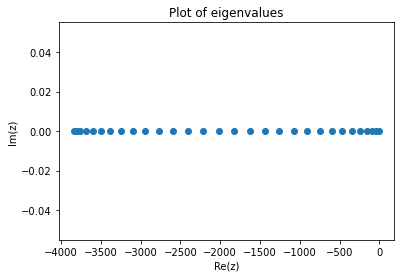

In [106]:
# YOUR CODE HERE
# Reference: https://www.tutorialspoint.com/How-to-Plot-Complex-Numbers-in-Python

eigenValues = compute_eigenvalues(30, 1/31)

x = [x.real for x in eigenValues]
y = [y.imag for y in eigenValues]

plt.scatter(x, y)
plt.title("Plot of eigenvalues")
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

**(c)** [15] - Think of the above matrix as specifying a system of ODEs.  The exact eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
for $p = 1, \ldots, m$.  Find an expression for $\max_{p = 1, \ldots, m} |\lambda_p|$.  Based on our understanding of absolute stability what be the maximum time-step we could use for this system of ODEs if we used the forward Euler method?  What about for the backward Euler method?  How does this relate to the absolute stability regions of each method?

YOUR ANSWER HERE

From $\lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)$, we know that $\cos(p \pi \Delta x) \in [-1, 1]$. Therefore, the maximum value for $|\cos(p \pi \Delta x) - 1| = |-2| = 2$. So 
$$
    \max_{p = 1, \ldots, m} |\lambda_p| = |\frac{2}{\Delta x^2} (-2)| = \frac{4}{\Delta x^2}
$$

With the initial condition $\Delta x = \frac{1}{31}$, we get $\max_{p = 1, \ldots, m} |\lambda_p| = \frac{4}{(\frac{1}{31})^2} = 3844$. 

From the Forward Euler method, plugging into $|1 + \Delta t \lambda_p| ≤ 1$, we get $\Delta t ≤ \frac{2}{3844} = 5.2 \times 10^{-4}$. (i.e. the maximum time-step we can use based on the forward Euler method) Similarly, for the Backward Euler method, we would plug into $|1 - \Delta t \lambda_p| ≥ 1$. 

## Question 3

Let us further explore the connection between the unit-ball in various norms and the matrix norm.  For all these questions you can use `numpy.linalg.norm` and `numpy.dot` and can be approximations, not the exact versions of what is being asked.  For these questions be aware also that there is a time-limit for running a cell in a notebook imposed so your results should not take longer than 15-30 seconds.

**(a)** [10] Write a function that given a particular norm plots the given unit-ball in $\mathbb R^2$.  You may use `numpy.linalg.norm`.  Use the test code to verify your results noting that there may be some special cases that need to be handled.

In [107]:
# reference: Lecture Notes (https://github.com/mandli/intro-numerical-methods/blob/master/10_LA_intro.ipynb)

def unit_ball(axes, ord):
    """Plot the unit-ball in $\mathbb R^2$
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the ball on
     - *ord* (float) The norm requested.
    """
    N = 100
    x, y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))
    V = numpy.empty((N,N))
    
    for i in range(N):
        for j in range(N):
            V[i,j] = numpy.linalg.norm(numpy.array([x[i,j], y[i,j]]), ord = ord)

    contourset = axes.contour(x, y, V, 'w', levels = [1])
    axes.set_ylim((-1.2, 1.2))
    axes.set_xlim((-1.2, 1.2))
    axes.grid(True)
    
    #for part b
    return contourset

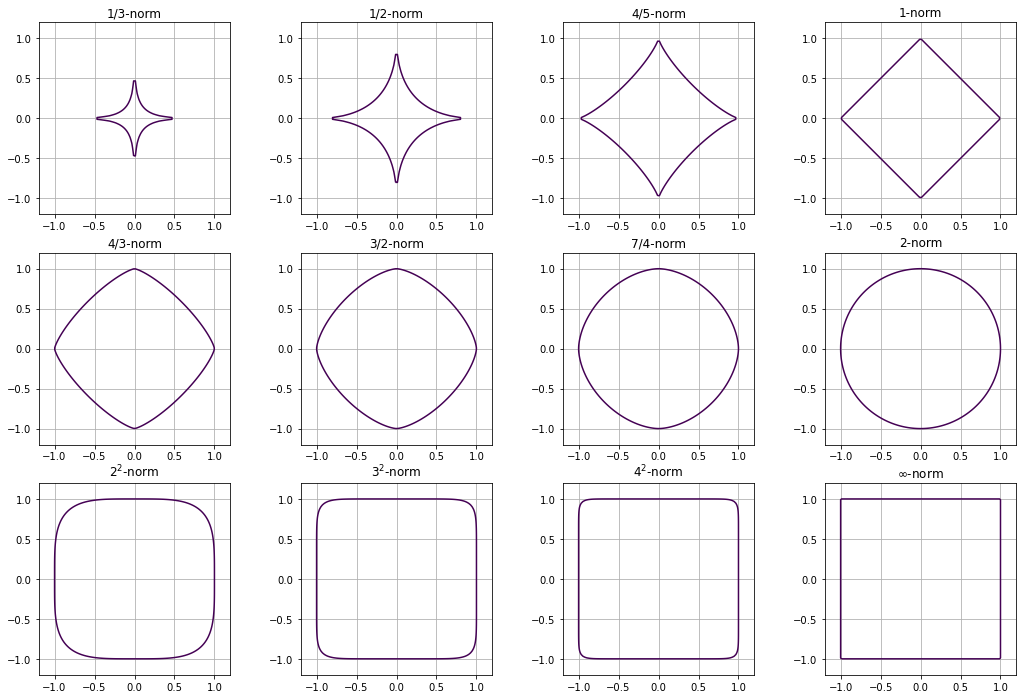

In [108]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [1.0 / 3.0, 0.5, 4.0 / 5.0, 1, 1.3, 1.5, 1.75, 2, 4, 9, 16, numpy.infty]
titles = ["1/3-norm", "1/2-norm", "4/5-norm", "1-norm", "4/3-norm", "3/2-norm", "7/4-norm", 
          "2-norm", "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(3, 4, i + 1, aspect='equal')
    unit_ball(axes, ord)
    axes.set_title(titles[i])
plt.show()

**(b)** [10] Now write a function that produces a plot of the image of the unit-ball given a matrix $A$ and returns the resulting matrix norm.  Both of these can be estimates of the norm but mind the time it takes to compute them.  You can also use `numpy.linalg.norm` for vectors but **NOT** the matrix (unless you want to check your answer).

In [111]:
def unit_ball_image(axes, A, ord):
    """Plot the image of the unit ball under the tranformation resulting from *A* 
    and return an estimate of the matrix norm 
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the transformed ball on
     - *A* (ndarray) Matrix that represents the mapping (transformation)
     - *ord* (float) The norm requested.
     
    :Output:
     - (float) Maximum norm estimate (i.e. the matrix norm)
    """
    # YOUR CODE HERE
#     raise NotImplementedError()
    ball = unit_ball(axes, ord).allsegs[0][0]
    
    image = A.dot(ball.T).T
    axes.plot(image[:,0], image[:,1], 'r')
    
    max_norm = numpy.max(numpy.linalg.norm(image, ord=ord, axis=1))
    
    if ord > 1:
        axes.set_ylim((-5.3, 5.3))
        axes.set_xlim((-5.3, 5.3))
    else: 
        axes.set_ylim((-3.1, 3.1))
        axes.set_xlim((-3.1, 3.1))
    axes.grid(True)
    
    return max_norm

0.5-Norm (estimated, true): (6.491186128196534, N/A)
1-Norm (estimated, true): (4.000000000000001, 4.0)
1.5-Norm (estimated, true): (4.06653549594927, N/A)
2-Norm (estimated, true): (4.130405446105712, 4.130648586880582)
4-Norm (estimated, true): (4.348594948751897, N/A)
9-Norm (estimated, true): (4.645354642208346, N/A)
16-Norm (estimated, true): (4.794164767344245, N/A)
inf-Norm (estimated, true): (4.977777777777778, 5.0)


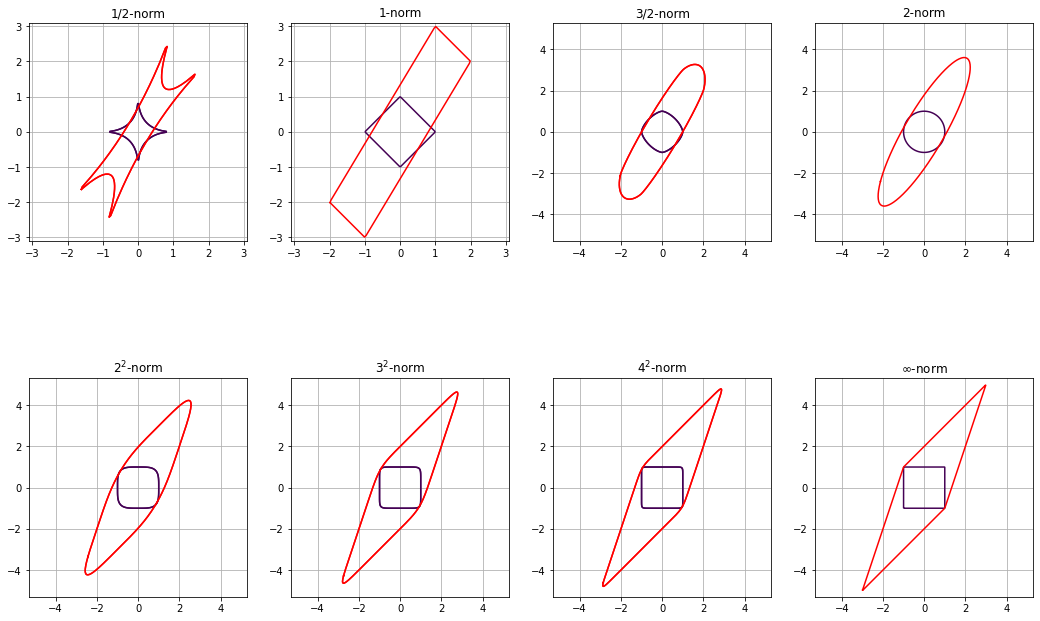

In [112]:
A = numpy.array([[1, 2], [3, 2]])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [0.5, 1, 1.5, 2, 4, 9, 16, numpy.infty]
titles = ["1/2-norm", "1-norm", "3/2-norm", "2-norm", 
          "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(2, 4, i + 1, aspect='equal')
    try:
        print("%s-Norm (estimated, true): (%s, %s)" % (ord, unit_ball_image(axes, A, ord), numpy.linalg.norm(A, ord=ord)))
    except ValueError:
        print("%s-Norm (estimated, true): (%s, N/A)" % (ord, unit_ball_image(axes, A, ord)))
    axes.set_title(titles[i])
plt.show()

**(c)** [5] What kind of observations can you make based on the two previous questions?  What connection to geometry do you see?  Are the matrix norms requested in part (b) that do not have a `numpy` implementation actually norms?

YOUR ANSWER HERE

In part (a), we see we plot the unit-ball based on the given matrix norms. Unit balls are the set of all points whose distance from the origin is 1. The norms induce the distance, and the unit ball becomes a collection of $\vec{x}$ such that $||\vec{x}||_p = 1$. For norms less than 1, we get a curved diamond shape which gradually becomes a diamond for the 1-norm, and for norms greater than 1, the unit-ball gradually goes from a diamond to a circle (at the 2-norm) to a square at the infinitt norm. For part (b), we draw the transformations of these unit-balls into ellipses, with the norms being a combination of the resulting ellipse. 

For a given $p$-norm, the matrix norm is defined for $1≤p<\infty$, so for $p<1$, they are not actually norms (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html). 
